In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("datasets/dataset_mood_smartphone.csv", sep=",", encoding="utf-8")

# only take columns: id, time, variable, value
df = df[['id', 'time', 'variable', 'value']]

# for grouping without aggregation


In [50]:
# drop where value is null
df = df.dropna(subset=['value'])

Spread column 'variable' into multiple columns

In [51]:
# Now pivot using the new auxiliary column as part of the index to ensure uniqueness
df['aux_index'] = df.groupby(['id', 'time', 'variable']).cumcount()
pivot_df = df.pivot(index=['id', 'time', 'aux_index'], columns='variable', values='value')
pivot_df = pivot_df.reset_index(level=['id', 'time'])
pivot_df


variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
aux_index,,,,,,,,,,,,,,,,,,,,,
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
pivot_df.to_csv('datasets/mood_preprocessed_no_aggr.csv', index=False)

Remove Outliers

In [190]:
# load
mood_df = pd.read_csv('datasets/mood_preprocessed_no_aggr.csv')

In [191]:
ranges = {
    'mood': [1, 10],
    'circumplex.arousal': [-2, 2],
    'circumplex.valence': [-2, 2],
    'activity': [0, 1],
    'call': [0, 1],
    'sms': [0, 1],
    'screen': [0, np.inf],
    'appCat.builtin': [0, np.inf],
    'appCat.communication': [0, np.inf],
    'appCat.entertainment': [0, np.inf],
    'appCat.finance': [0, np.inf],
    'appCat.game': [0, np.inf],
    'appCat.office': [0, np.inf],
    'appCat.other': [0, np.inf],
    'appCat.social': [0, np.inf],
    'appCat.travel': [0, np.inf],
    'appCat.unknown': [0, np.inf],
    'appCat.utilities': [0, np.inf],
    'appCat.weather': [0, np.inf],
}

def remove_outliers(df, lower_q=0.25, upper_q=0.75, threshold=1.5):
    outliers = []
    for column in df.columns:
        if column in ranges:
            valid_range = ranges[column]
            Q1 = df[column].quantile(lower_q)
            Q3 = df[column].quantile(upper_q)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR if valid_range[0] == -np.inf else valid_range[0]
            upper_bound = Q3 + threshold * IQR if valid_range[1] == np.inf else valid_range[1]

            outliers.append(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index)

    distinct_outliers = list(set(np.concatenate(outliers)))
    print(f"Removing {len(distinct_outliers)} outliers")
    return df.drop(distinct_outliers)

In [192]:
mood_no_outliers_df = remove_outliers(mood_df)

Removing 35421 outliers


In [248]:

mood_no_outliers_df['circumplex.arousal'].value_counts()

circumplex.arousal
 1.0    1654
-1.0    1612
 0.0    1586
-2.0     521
 2.0     224
Name: count, dtype: int64

In [204]:
mood_no_outliers_df.head()

,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Impute Missing Values

In [240]:
# load
pivot_df = mood_no_outliers_df.copy(deep=True)
pivot_df['time'] = pd.to_datetime(pivot_df['time'])
#pivot_df

In [241]:
# mood, circumplex.arousal, circumplex.valence, activity: most recent value for each user


# Impute missing values
pivot_df['mood'] = pivot_df.groupby('id')['mood'].transform(lambda x: x.fillna(method='ffill'))

# Impute missing values for circumplex.arousal, circumplex.valence, and activity
pivot_df['circumplex.arousal'] = pivot_df.groupby('id')['circumplex.arousal'].transform(lambda x: x.fillna(method='ffill'))
pivot_df['circumplex.valence'] = pivot_df.groupby('id')['circumplex.valence'].transform(lambda x: x.fillna(method='ffill'))
pivot_df['activity'] = pivot_df.groupby('id')['activity'].transform(lambda x: x.fillna(method='ffill'))
# 
# # screen: if less than sum of aoo.cat columns or missing, impute with sum of all app.cat columns
# 
# # Impute missing values for screen
app_cat_cols = [
#     'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance',
#     'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
#     'appCat.unknown', 'appCat.utilities', 'appCat.weather'
]
pivot_df['screen'].fillna(0, inplace=True)
pivot_df['screen'] = pivot_df.apply(
    lambda x: x['screen'] if x['screen'] >= sum(x[app_cat_cols]) else sum(x[app_cat_cols]), axis=1
)


/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/1000814911.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df['mood'] = pivot_df.groupby('id')['mood'].transform(lambda x: x.fillna(method='ffill'))
/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/1000814911.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df['circumplex.arousal'] = pivot_df.groupby('id')['circumplex.arousal'].transform(lambda x: x.fillna(method='ffill'))
/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/1000814911.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df['circumplex.valence'] = pivot_df.groupby('id')['circumplex.valence'].transform(lambda x: x.fillna(method='ffill'))
/var/

In [244]:
pivot_df[pivot_df['mood'].isnull()]

,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms


In [243]:
# mood, circumplex.arousal, circumplex.valence, activity: next non nan value for each user
# Impute missing values
pivot_df['mood'] = pivot_df.groupby('id')['mood'].transform(lambda x: x.fillna(method='bfill'))
pivot_df['circumplex.arousal'] = pivot_df.groupby('id')['circumplex.arousal'].transform(lambda x: x.fillna(method='bfill'))
pivot_df['circumplex.valence'] = pivot_df.groupby('id')['circumplex.valence'].transform(lambda x: x.fillna(method='bfill'))
pivot_df['activity'] = pivot_df.groupby('id')['activity'].transform(lambda x: x.fillna(method='bfill'))

/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/4231250036.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df['mood'] = pivot_df.groupby('id')['mood'].transform(lambda x: x.fillna(method='bfill'))
/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/4231250036.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df['circumplex.arousal'] = pivot_df.groupby('id')['circumplex.arousal'].transform(lambda x: x.fillna(method='bfill'))
/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/4231250036.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df['circumplex.valence'] = pivot_df.groupby('id')['circumplex.valence'].transform(lambda x: x.fillna(method='bfill'))
/var/

In [245]:
# drop rows with missing values in columns: activity, circumplex.arousal, circumplex.valence, mood
pivot_df = pivot_df.dropna(subset=['activity', 'circumplex.arousal', 'circumplex.valence', 'mood'])

In [246]:
pivot_df

,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,-1.0,0.0,6.0,0.0,NaN
1,AS14.01,2014-02-17 18:28:25.520,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,-1.0,0.0,6.0,0.0,NaN
2,AS14.01,2014-02-18 09:29:51.257,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,-1.0,0.0,6.0,0.0,NaN
3,AS14.01,2014-02-19 14:43:30.575,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,-1.0,0.0,6.0,0.0,NaN
4,AS14.01,2014-02-19 17:29:10.378,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,-1.0,0.0,6.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358939,AS14.33,2014-05-30 22:32:05.016,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,-2.0,-1.0,6.0,0.0,NaN
358940,AS14.33,2014-05-30 22:32:11.049,0.375000,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.0,-1.0,6.0,0.0,NaN
358941,AS14.33,2014-05-30 22:32:14.240,0.375000,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.0,-1.0,6.0,0.0,NaN
358942,AS14.33,2014-05-30 22:32:15.246,0.375000,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.0,-1.0,6.0,0.0,NaN


In [249]:
pivot_df.to_csv('datasets/mood_preprocessed_cleaned.csv', index=False)

Plot Number of Rows Per Day for Each User

In [250]:
# load
pivot_df = pd.read_csv('datasets/mood_preprocessed_cleaned.csv')
pivot_df['time'] = pd.to_datetime(pivot_df['time'])

/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/1884449578.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20b', 27)  # 'tab20b' is a good choice for many distinct colors


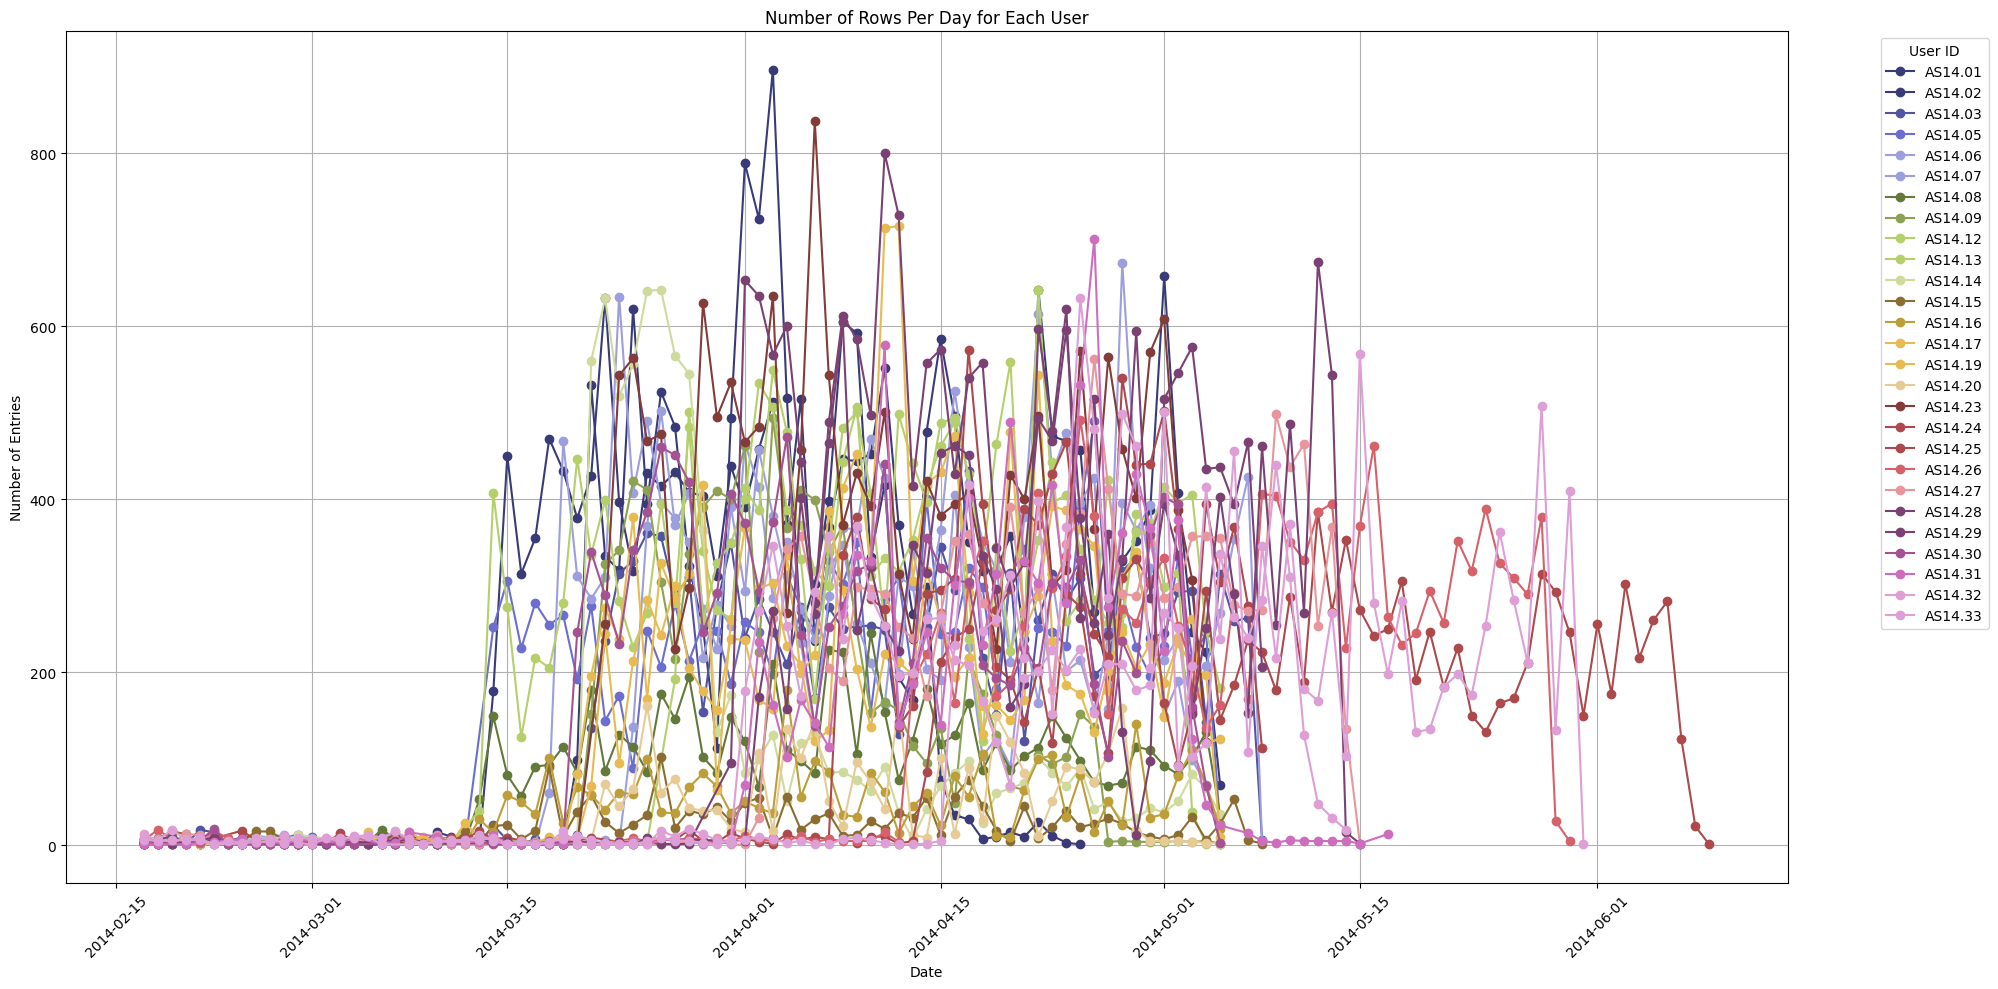

In [251]:
# Plot
cmap = plt.cm.get_cmap('tab20b', 27)  # 'tab20b' is a good choice for many distinct colors

# Plot settings
plt.figure(figsize=(20, 10))

# Loop through each unique user
for idx, user_id in enumerate(pivot_df['id'].unique()):
    # Filter for each user
    user_df = pivot_df[pivot_df['id'] == user_id]

    # Group by date and count rows
    daily_counts = user_df.groupby(user_df['time'].dt.date).size()

    # Plotting each user's data on the same plot
    daily_counts.plot(kind='line', marker='o', label=user_id, color=cmap(idx))

plt.title('Number of Rows Per Day for Each User')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# save the plot
plt.savefig('figs/number_of_rows_per_user_per_day.png')

plt.show()

In [252]:
sum_cols = [
    'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
    'appCat.entertainment', 'appCat.finance', 'appCat.game',
    'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
    'appCat.unknown', 'appCat.utilities', 'appCat.weather'
] 
mean_cols = ['circumplex.arousal', 'circumplex.valence', 'activity']
median_cols = ['mood']

In [253]:
pivot_df['time'] = pd.to_datetime(pivot_df['time'].dt.date)

In [254]:
sum_id_df = pivot_df.groupby(['time', 'id']).size().reset_index(name='count')

In [255]:
sum_id_df

,time,id,count
0,2014-02-17,AS14.01,2
1,2014-02-17,AS14.02,6
2,2014-02-17,AS14.03,1
3,2014-02-17,AS14.06,5
4,2014-02-17,AS14.08,4
...,...,...,...
1968,2014-06-05,AS14.24,260
1969,2014-06-06,AS14.24,282
1970,2014-06-07,AS14.24,123
1971,2014-06-08,AS14.24,22


In [256]:
sum_id_df.groupby('id')['count'].mean()

id
AS14.01    264.750000
AS14.02    195.294118
AS14.03    164.818182
AS14.05    193.685714
AS14.06    208.418919
AS14.07    271.320000
AS14.08     95.955224
AS14.09    130.352113
AS14.12    228.014925
AS14.13    236.041667
AS14.14    108.916667
AS14.15     23.430380
AS14.16     43.635135
AS14.17    187.626667
AS14.19    136.821918
AS14.20     43.469697
AS14.23    300.365079
AS14.24    199.000000
AS14.25    141.653333
AS14.26    138.580000
AS14.27    166.087500
AS14.28    300.568966
AS14.29    207.109589
AS14.30    191.071429
AS14.31    127.307692
AS14.32    113.976744
AS14.33    133.138614
Name: count, dtype: float64

In [257]:
pivot_df.columns

Index(['id', 'time', 'activity', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'circumplex.arousal', 'circumplex.valence', 'mood', 'screen', 'sms'],
      dtype='object')

In [258]:
# Perform aggregation
# Aggregate using sum and mean as specified
sum_df = pivot_df.groupby(['time', 'id'])[sum_cols].sum()
mean_df = pivot_df.groupby(['time', 'id'])[mean_cols].mean()
median_df = pivot_df.groupby(['time', 'id'])[median_cols].median()

# Combine the results back into a single DataFrame
aggregated_df = pd.concat([sum_df, mean_df, median_df], axis=1).reset_index()
aggregated_df.columns = ['date', 'id'] + sum_cols + mean_cols + median_cols

In [259]:
aggregated_df

,date,id,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,...,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,circumplex.arousal,circumplex.valence,activity,mood
0,2014-02-17,AS14.01,0.000000,2.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,-1.000000,0.0,0.071429,6.0
1,2014-02-17,AS14.02,0.000000,4.0,2.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,1.0,0.142857,7.0
2,2014-02-17,AS14.03,0.000000,0.0,1.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,1.000000,2.0,0.290000,9.0
3,2014-02-17,AS14.06,0.000000,5.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,-1.000000,0.0,0.120000,7.0
4,2014-02-17,AS14.08,0.000000,0.0,4.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,1.0,0.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,2014-06-05,AS14.24,1620.056999,11.0,0.0,801.994,795.073,0.0,0.0,0.0,...,47.360,171.964,225.737,0.0,0.000,0.0,0.223077,1.0,0.253627,7.0
1969,2014-06-06,AS14.24,2169.781000,16.0,0.0,838.897,1205.799,0.0,0.0,0.0,...,36.414,0.000,0.000,0.0,2.072,0.0,0.702128,1.0,0.287322,7.0
1970,2014-06-07,AS14.24,1121.516999,0.0,2.0,171.285,411.638,0.0,0.0,0.0,...,6.214,106.850,0.000,0.0,0.000,0.0,0.333333,1.0,0.317301,8.0
1971,2014-06-08,AS14.24,111.459000,0.0,0.0,88.239,3.042,0.0,0.0,0.0,...,18.069,0.000,0.000,0.0,0.000,0.0,-1.409091,1.0,0.102054,7.0


In [260]:
# save
aggregated_df.to_csv('datasets/mood_preprocessed_aggr_per_day.csv', index=False)

In [261]:
count_mood_none = sum_id_df.iloc[list(aggregated_df[aggregated_df['mood'].isnull()].index)]
count_mood_none.shape

(0, 3)

In [262]:
count_mood_none[count_mood_none['count'] > 100]

,time,id,count


In [263]:
aggregated_at_least_5_df = aggregated_df.iloc[list(sum_id_df[sum_id_df['count'] > 5].index)]

In [264]:
aggregated_at_least_5_df

,date,id,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,...,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,circumplex.arousal,circumplex.valence,activity,mood
1,2014-02-17,AS14.02,0.000000,4.0,2.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,0.000000,1.0,0.142857,7.0
7,2014-02-17,AS14.14,0.000000,0.0,7.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,-1.000000,1.0,0.355140,7.0
8,2014-02-17,AS14.15,0.000000,7.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,-1.000000,0.0,0.000000,6.0
11,2014-02-17,AS14.19,0.000000,10.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,1.000000,0.0,0.000000,3.0
15,2014-02-17,AS14.26,0.000000,6.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.000,0.0,1.000000,1.0,0.000000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,2014-06-04,AS14.24,2029.358000,1.0,1.0,497.604,2135.893,0.0,0.0,0.0,...,38.774,68.938,0.000,0.0,0.000,0.0,0.400922,1.0,0.036303,7.0
1968,2014-06-05,AS14.24,1620.056999,11.0,0.0,801.994,795.073,0.0,0.0,0.0,...,47.360,171.964,225.737,0.0,0.000,0.0,0.223077,1.0,0.253627,7.0
1969,2014-06-06,AS14.24,2169.781000,16.0,0.0,838.897,1205.799,0.0,0.0,0.0,...,36.414,0.000,0.000,0.0,2.072,0.0,0.702128,1.0,0.287322,7.0
1970,2014-06-07,AS14.24,1121.516999,0.0,2.0,171.285,411.638,0.0,0.0,0.0,...,6.214,106.850,0.000,0.0,0.000,0.0,0.333333,1.0,0.317301,8.0


In [265]:
aggregated_at_least_5_df.to_csv('datasets/mood_preprocessed_aggr_per_day_at_least_5.csv', index=False)